In [1]:
import os
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
rawdata = sio.loadmat('Subject1_1D.mat')

In [2]:
# rawdata2 = sio.loadmat('Subject1_1D1.mat')
# rawdata2

In [3]:
!https_proxy=http://192.41.170.23:3128 http_proxy=http://192.41.170.23:3128 pip install mne
!https_proxy=http://192.41.170.23:3128 http_proxy=http://192.41.170.23:3128 pip install mne --user
!https_proxy=http://192.41.170.23:3128 http_proxy=http://192.41.170.23:3128 pip install cupy-cuda114

     |████████████████████████████████| 7.4 MB 1.1 MB/s            
     |████████████████████████████████| 78.3 MB 114 kB/s             
     |████████████████████████████████| 49 kB 3.1 MB/s             


In [4]:
rawdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'readme', 'left', 'right', 'baseline'])

In [62]:
rawdata['readme']

array(['This subject is a 21 year old, right handed male with no known medical conditions. The EEG consists of actual random movements of left and right hand recorded with eyes closed. Each row represents one electrode. The order of the electrodes is FP1 FP2 F3 F4 C3 C4 P3 P4 O1 O2 F7 F8 T3 T4 T5 T6 FZ CZ PZ. The recording was done at 500Hz using Neurofax EEG System which uses a daisy chain montage. The data was exported with a common reference using Eemagine EEG. AC Lines in this country work at 50 Hz. For further information, please contact midhatali@gmail.com'],
      dtype='<U560')

In [7]:
# rawdata2['right'].shape

In [8]:
rawdata['right'].shape

(19, 64300)

In [9]:
rawdata['left']

array([[  -5.078,  -17.48 ,    2.051, ...,  -59.277,  -59.668,  -60.254],
       [  -5.078,  -18.359,  -11.426, ..., -291.016, -291.504, -270.703],
       [   7.91 ,   -8.203,   32.129, ...,  -25.391,  -20.117,  -26.172],
       ...,
       [  -6.055,  -17.773,    1.66 , ...,   33.008,   31.055,   34.375],
       [  -7.91 ,  -10.742,    2.344, ..., -149.316, -148.926, -141.113],
       [  -3.809,   -9.766,    2.344, ...,   69.727,   72.559,   79.59 ]])

In [10]:
rawdata['left'].shape

(19, 64300)

In [11]:
print('shape right',rawdata['right'].shape)
print('shape left',rawdata['left'].shape)
print('shape baseline',rawdata['baseline'].shape)

shape right (19, 64300)
shape left (19, 64300)
shape baseline (19, 64300)


In [12]:
row_order = 'FP1 FP2 F3 F4 C3 C4 P3 P4 O1 O2 F7 F8 T3 T4 T5 T6 FZ CZ PZ'
row_order = row_order.split()
row_order = dict(enumerate(row_order))
rawdata_left = pd.DataFrame.from_dict(rawdata['left'])
rawdata_left = rawdata_left.T
rawdata_left = rawdata_left.rename(columns=row_order)
rawdata_left.reset_index(inplace =True)

In [13]:
row_order = 'FP1 FP2 F3 F4 C3 C4 P3 P4 O1 O2 F7 F8 T3 T4 T5 T6 FZ CZ PZ'
row_order = row_order.split()
row_order = dict(enumerate(row_order))
rawdata_right = pd.DataFrame.from_dict(rawdata['right'])
rawdata_right = rawdata_right.T
rawdata_right = rawdata_right.rename(columns=row_order)
rawdata_right.reset_index(inplace =True)

In [14]:
row_order = 'FP1 FP2 F3 F4 C3 C4 P3 P4 O1 O2 F7 F8 T3 T4 T5 T6 FZ CZ PZ'
row_order = row_order.split()
row_order = dict(enumerate(row_order))
baseline = pd.DataFrame.from_dict(rawdata['baseline'])
baseline = baseline.T
baseline = baseline.rename(columns=row_order)
baseline.reset_index(inplace =True)

In [15]:
baseline.head()

,index,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,FZ,CZ,PZ
0,0,-41.016,-20.605,-36.523,-1.367,10.352,-7.910,-10.645,-7.031,-19.238,-11.426,-43.750,-52.246,-43.848,-7.422,-23.535,-8.008,-31.641,-17.578,-12.207
1,1,-9.375,-4.492,-30.078,-12.402,15.723,-14.453,9.082,16.309,3.223,8.691,11.035,-8.887,-11.816,-10.937,9.473,18.066,0.000,2.441,10.352
2,2,-1.172,11.230,-7.715,-1.172,29.102,-25.000,18.457,27.051,12.402,12.793,62.402,-9.668,15.234,-36.230,29.492,29.688,2.441,12.402,19.434
3,3,-4.297,13.770,-7.031,11.133,38.770,-29.395,19.434,30.762,4.785,12.402,33.887,-28.320,5.957,-63.770,19.043,31.738,7.617,16.406,21.484
4,4,9.766,18.457,1.855,22.949,23.145,-13.379,44.434,46.094,32.520,31.055,73.633,-16.016,37.012,-66.113,51.855,42.773,12.109,19.727,37.305


In [16]:
rawdata_left.head()

,index,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,FZ,CZ,PZ
0,0,-5.078,-5.078,7.910,-6.250,-3.027,4.492,-0.391,-5.664,2.344,-17.773,-8.594,4.004,-15.918,17.578,-0.293,-3.906,-6.055,-7.910,-3.809
1,1,-17.480,-18.359,-8.203,-13.574,6.738,-11.230,-7.813,-9.570,-10.547,-19.531,-28.125,0.781,-40.918,6.738,-18.262,-7.910,-17.773,-10.742,-9.766
2,2,2.051,-11.426,32.129,-2.832,12.012,-19.043,7.617,9.766,-0.684,-9.766,-17.969,29.102,-21.875,-13.965,-6.250,11.426,1.660,2.344,2.344
3,3,31.152,14.941,58.887,13.477,14.062,-19.043,30.664,30.176,19.043,6.836,15.137,44.238,15.039,-42.188,27.637,30.566,22.656,18.262,18.652
4,4,37.500,24.609,47.949,23.633,24.609,-24.902,37.988,34.668,21.191,4.297,30.664,30.371,19.824,-80.176,38.965,30.371,27.734,21.875,19.141


In [17]:
N = rawdata_left['C4'].shape[0]
rms = np.sqrt(sum(rawdata_left['C4']**2)/N)
rms

47.59567036742421

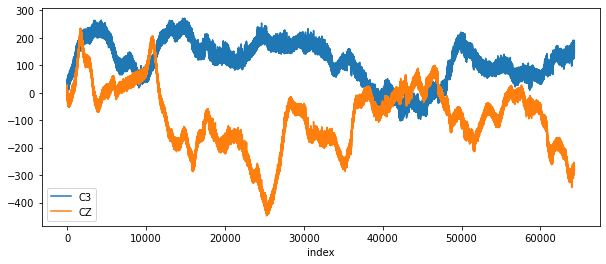

In [18]:
axis = plt.gca()
downSampleToShow = 500
baseline.plot(x="index", y="C3", ax=axis, figsize=(10,4))
# baseline.plot(x="index", y="C4", ax=axis, figsize=(10,4))
baseline.plot(x="index", y="CZ", ax=axis, figsize=(10,4))
plt.show()

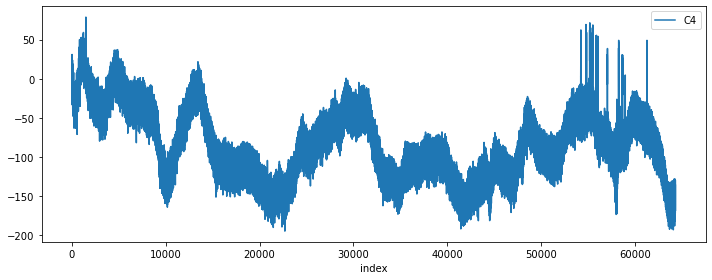

In [66]:
axis = plt.gca()
downSampleToShow = 500
rawdata_right.plot(x="index", y="C4", ax=axis, figsize=(10,4))
plt.show()

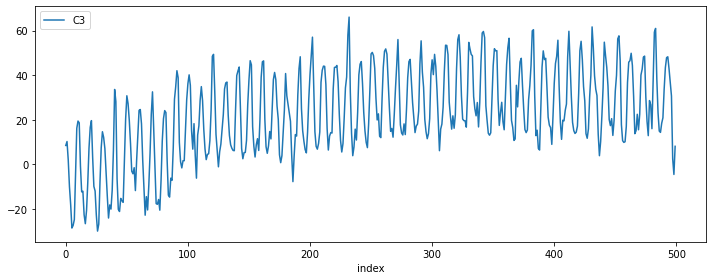

In [64]:
axis = plt.gca()
downSampleToShow = 500
rawdata_right[:500].plot(x="index", y="C3", ax=axis, figsize=(10,4))
plt.show()

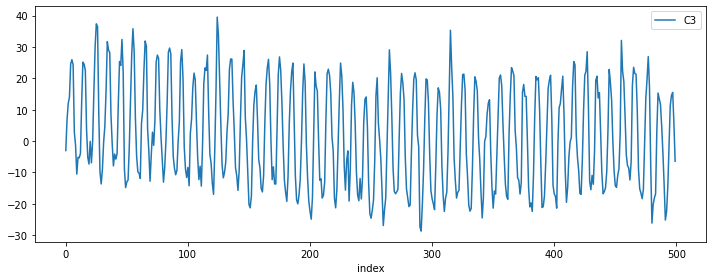

In [65]:
axis = plt.gca()
downSampleToShow = 500
rawdata_left[:500].plot(x="index", y="C3", ax=axis, figsize=(10,4))
plt.show()

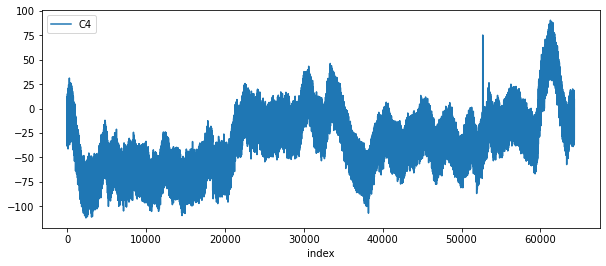

In [22]:
axis = plt.gca()
downSampleToShow = 500
rawdata_left.plot(x="index", y="C4", ax=axis, figsize=(10,4))
plt.show()

<a list of 2 Line2D objects>
Line2D(_line0)
Line2D(_line1)


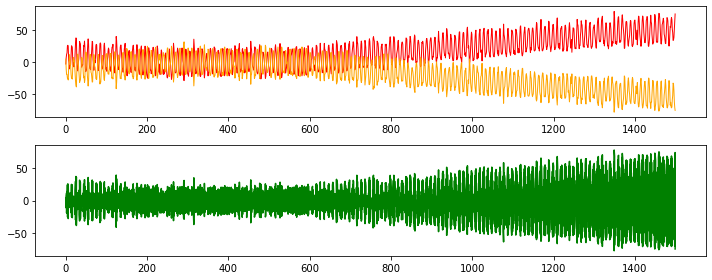

In [23]:
x  = rawdata_left[:1500]['index']
y1 =rawdata_left[:1500]['C3']
y2 =rawdata_left[:1500]['C4']
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True
plt.subplot(211)
plt.plot(x, y1, color='red', lw=1)
plt.plot(x, y2, color='orange', lw=1)

X, Y = [], []
print(plt.gca().get_lines())
for lines in plt.gca().get_lines():
    print(lines)
    for x, y in lines.get_xydata():
        X.append(x)
        Y.append(y)
idx = np.argsort(X)
X = np.array(X)[idx]
Y = np.array(Y)[idx]

plt.subplot(212)

plt.plot(X, Y, color='green')

plt.show()

In [24]:
from scipy.signal import filtfilt
from scipy import stats
import scipy.integrate 

In [25]:
rawdata_left.shape,rawdata_right.shape

((64300, 20), (64300, 20))

In [26]:
def bandPassFilter(signal):
    fs = rawdata_left['C4'].shape[0]
    lowcut = 0.01
    highcut = 64.0
    nyq = 0.5 * fs 
    low = lowcut / nyq
    high = highcut/ nyq
    # print(high,low)
    # low = lowcut
    # high = highcut
    
    order = 2
    b,a = scipy.signal.butter(order,[low,high],'bandpass',analog =False)
    y = scipy.signal.filtfilt(b,a,signal,axis = 0)
    return y

def get_filter(data):
    sensor_data = data
    sensor_data = np.array(sensor_data)
    # time =  np.linspace(0,0.02,rawdata_left['C4'].shape[0])    
    filtered_signal = bandPassFilter(sensor_data)
    
    return filtered_signal


In [27]:
time =  np.linspace(0,rawdata_left['C4'].shape[0],rawdata_left['C4'].shape[0])    
filtered_leftc4 = bandPassFilter(rawdata_left['C4'])
filtered_leftc3 = bandPassFilter(rawdata_left['C3'])
filtered_rightc4 = bandPassFilter(rawdata_right['C4'])
filtered_rightc3 = bandPassFilter(rawdata_right['C3'])
# filtered_rightCZ = bandPassFilter(rawdata_right['CZ'])
# filtered_leftCZ = bandPassFilter(rawdata_left['CZ'])
filtered_baselinec3 = bandPassFilter(baseline['C3'])
filtered_baselinec4 = bandPassFilter(baseline['C4'])

Text(0.5, 1.0, 'Left C3 filtered')

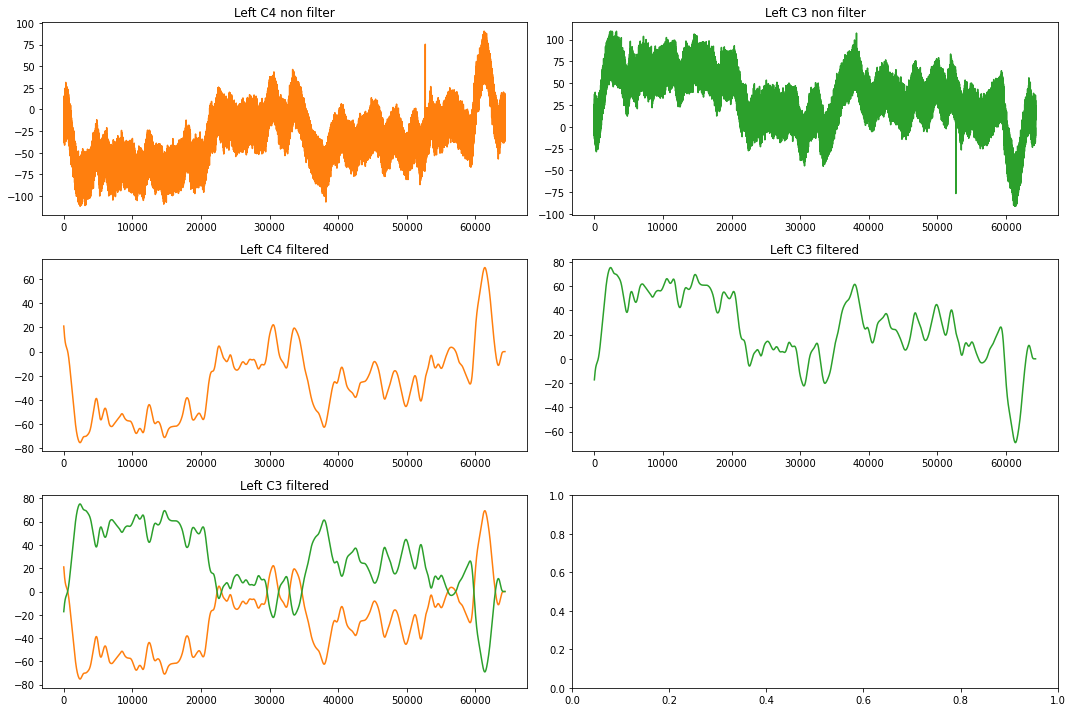

In [28]:

fig, axs = plt.subplots(3, 2 ,figsize=(15, 10))
axs[0, 0].plot(time,rawdata_left['C4'],'tab:orange')
axs[0, 0].set_title('Left C4 non filter')
axs[1, 0].plot(time, filtered_leftc4, 'tab:orange')
axs[1, 0].set_title('Left C4 filtered')

axs[0, 1].plot(time,rawdata_left['C3'],'tab:green')
axs[0, 1].set_title('Left C3 non filter')
axs[1, 1].plot(time, filtered_leftc3, 'tab:green')
axs[1, 1].set_title('Left C3 filtered')


axs[2, 0].plot(time, filtered_leftc4, 'tab:orange')
axs[2, 0].set_title('Left C4 filtered')
axs[2, 0].plot(time, filtered_leftc3, 'tab:green')
axs[2, 0].set_title('Left C3 filtered')

Text(0.5, 1.0, 'Left C4 filtered,Left C3 filtered')

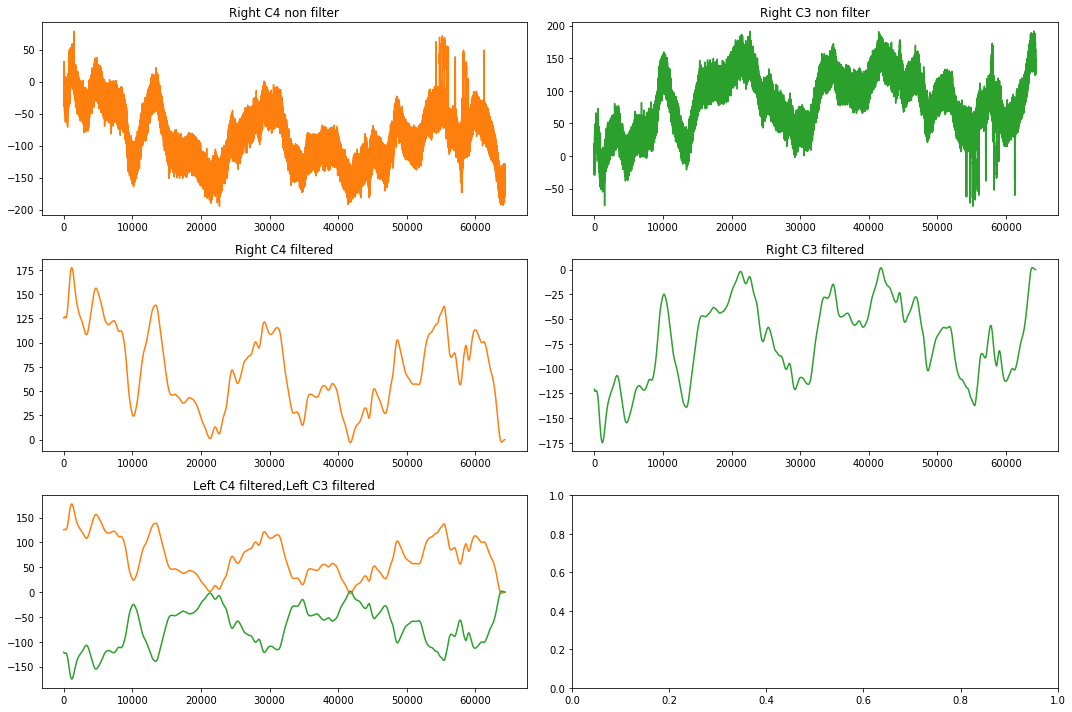

In [29]:
fig, axs = plt.subplots(3, 2 ,figsize=(15, 10))
axs[0, 0].plot(time,rawdata_right['C4'],'tab:orange')
axs[0, 0].set_title('Right C4 non filter')
axs[1, 0].plot(time, filtered_rightc4, 'tab:orange')
axs[1, 0].set_title('Right C4 filtered')

axs[0, 1].plot(time,rawdata_right['C3'],'tab:green')
axs[1, 1].plot(time, filtered_rightc3, 'tab:green')
axs[1, 1].set_title('Right C3 filtered')
axs[0, 1].set_title('Right C3 non filter')

axs[2, 0].plot(time, filtered_rightc4, 'tab:orange')
axs[2, 0].plot(time, filtered_rightc3, 'tab:green')
axs[2, 0].set_title('Left C4 filtered,Left C3 filtered')

Text(0.5, 1.0, 'Left C4 filtered,right C3 filtered')

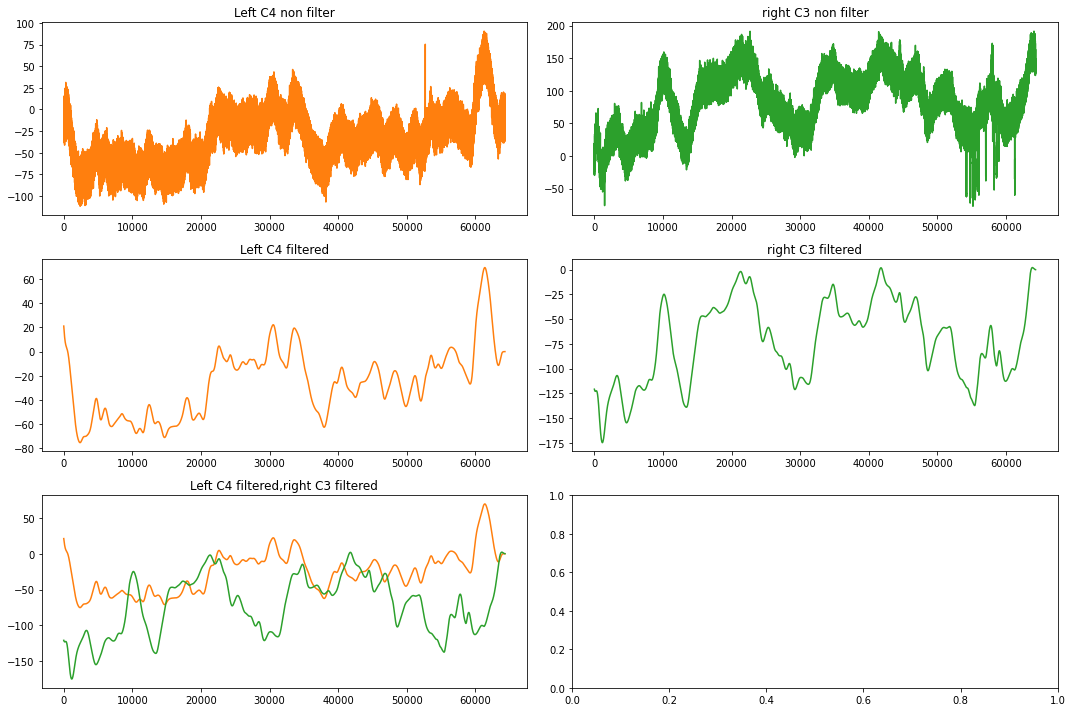

In [30]:
fig, axs = plt.subplots(3, 2 ,figsize=(15, 10))
axs[0, 0].plot(time,rawdata_left['C4'],'tab:orange')
axs[0, 0].set_title('Left C4 non filter')
axs[1, 0].plot(time, filtered_leftc4, 'tab:orange')
axs[1, 0].set_title('Left C4 filtered')

axs[0, 1].plot(time,rawdata_right['C3'],'tab:green')
axs[0, 1].set_title('right C3 non filter')
axs[1, 1].plot(time, filtered_rightc3, 'tab:green')
axs[1, 1].set_title('right C3 filtered')


axs[2, 0].plot(time, filtered_leftc4, 'tab:orange')
axs[2, 0].plot(time, filtered_rightc3, 'tab:green')
axs[2, 0].set_title('Left C4 filtered,right C3 filtered')

Text(0.5, 1.0, 'right C3 filtered')

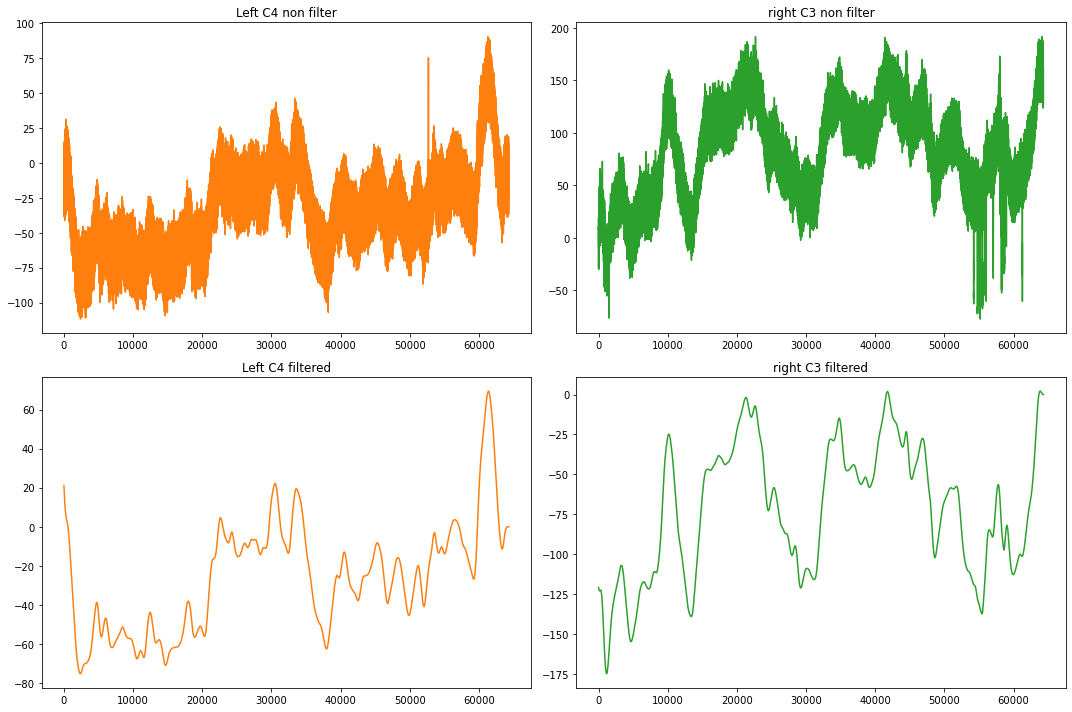

In [31]:
fig, axs = plt.subplots(2, 2 ,figsize=(15, 10))
axs[0, 0].plot(time,rawdata_left['C4'],'tab:orange')
axs[0, 0].set_title('Left C4 non filter')
axs[1, 0].plot(time, filtered_leftc4, 'tab:orange')
axs[1, 0].set_title('Left C4 filtered')

axs[0, 1].plot(time,rawdata_right['C3'],'tab:green')
axs[0, 1].set_title('right C3 non filter')
axs[1, 1].plot(time, filtered_rightc3, 'tab:green')
axs[1, 1].set_title('right C3 filtered')

Text(0.5, 1.0, 'Left C4 filtered,right C4 filtered')

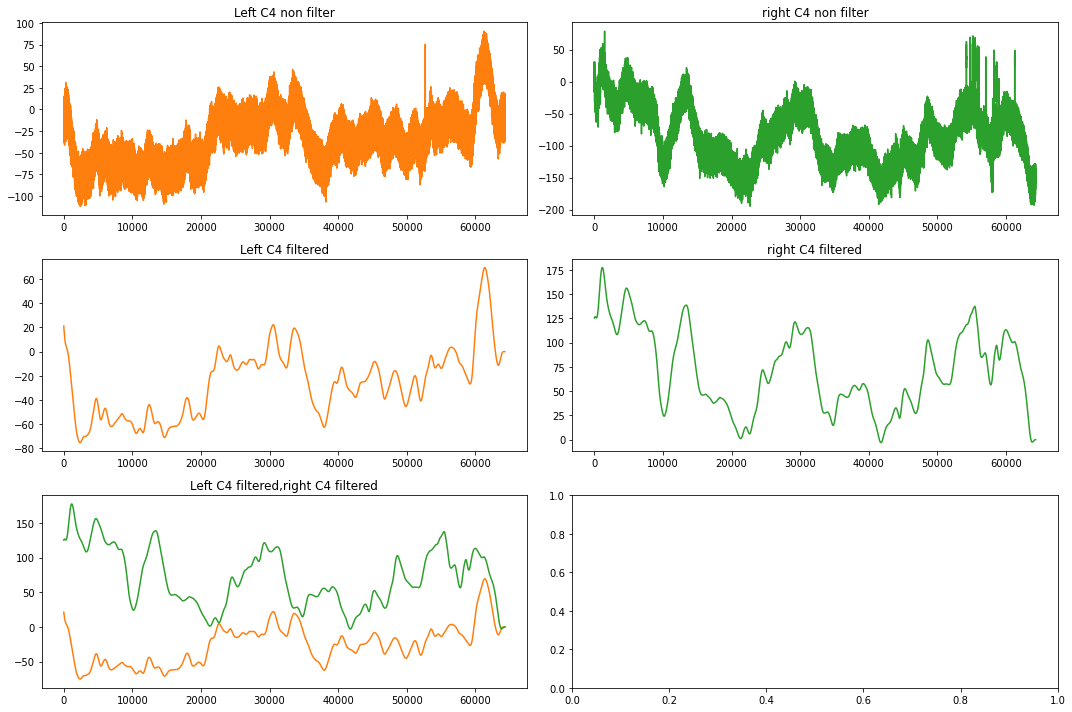

In [32]:
fig, axs = plt.subplots(3, 2 ,figsize=(15, 10))
axs[0, 0].plot(time,rawdata_left['C4'],'tab:orange')
axs[0, 0].set_title('Left C4 non filter')
axs[1, 0].plot(time, filtered_leftc4, 'tab:orange')
axs[1, 0].set_title('Left C4 filtered')

axs[0, 1].plot(time,rawdata_right['C4'],'tab:green')
axs[0, 1].set_title('right C4 non filter')
axs[1, 1].plot(time, filtered_rightc4, 'tab:green')
axs[1, 1].set_title('right C4 filtered')

axs[2, 0].plot(time, filtered_leftc4, 'tab:orange')
axs[2, 0].plot(time, filtered_rightc4, 'tab:green')
axs[2, 0].set_title('Left C4 filtered,right C4 filtered')

Text(0.5, 1.0, 'filtered_baselinec4,filtered_baselinec3')

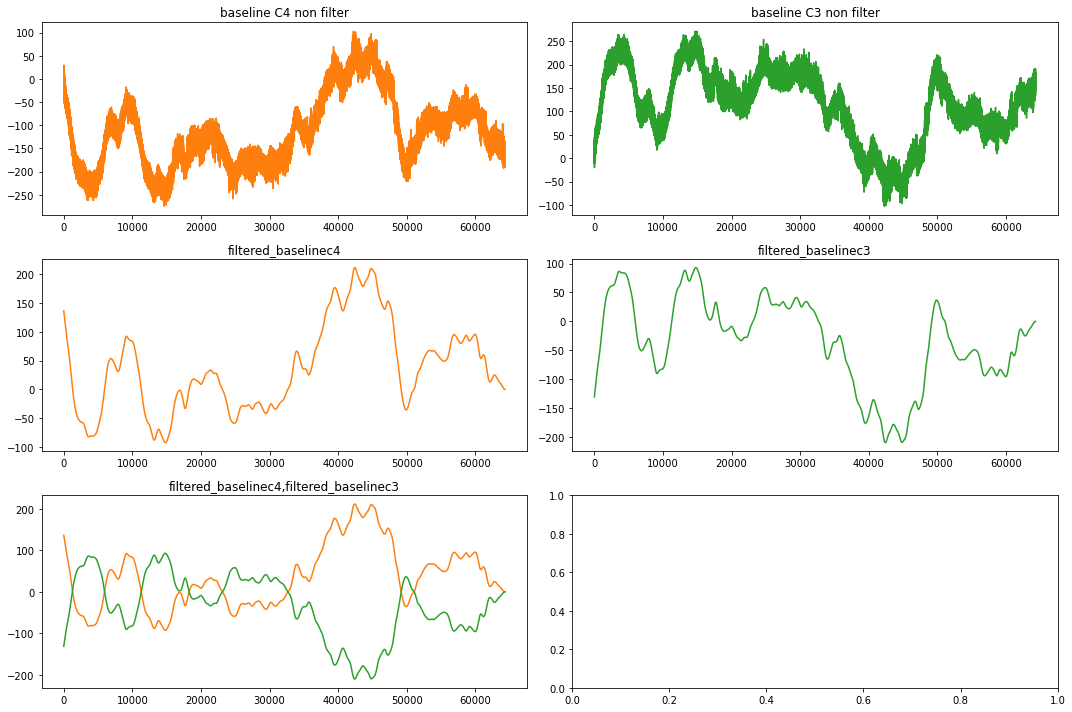

In [33]:
fig, axs = plt.subplots(3, 2 ,figsize=(15, 10))
axs[0, 0].plot(time,baseline['C4'],'tab:orange')
axs[0, 0].set_title('baseline C4 non filter')
axs[1, 0].plot(time, filtered_baselinec4, 'tab:orange')
axs[1, 0].set_title('filtered_baselinec4')

axs[0, 1].plot(time,baseline['C3'],'tab:green')
axs[0, 1].set_title('baseline C3 non filter')
axs[1, 1].plot(time, filtered_baselinec3, 'tab:green')
axs[1, 1].set_title('filtered_baselinec3')


axs[2, 0].plot(time, filtered_baselinec4, 'tab:orange')
axs[2, 0].plot(time, filtered_baselinec3, 'tab:green')
axs[2, 0].set_title('filtered_baselinec4,filtered_baselinec3')

Text(0.5, 1.0, 'filtered_baselinec4,filtered_baselinec3')

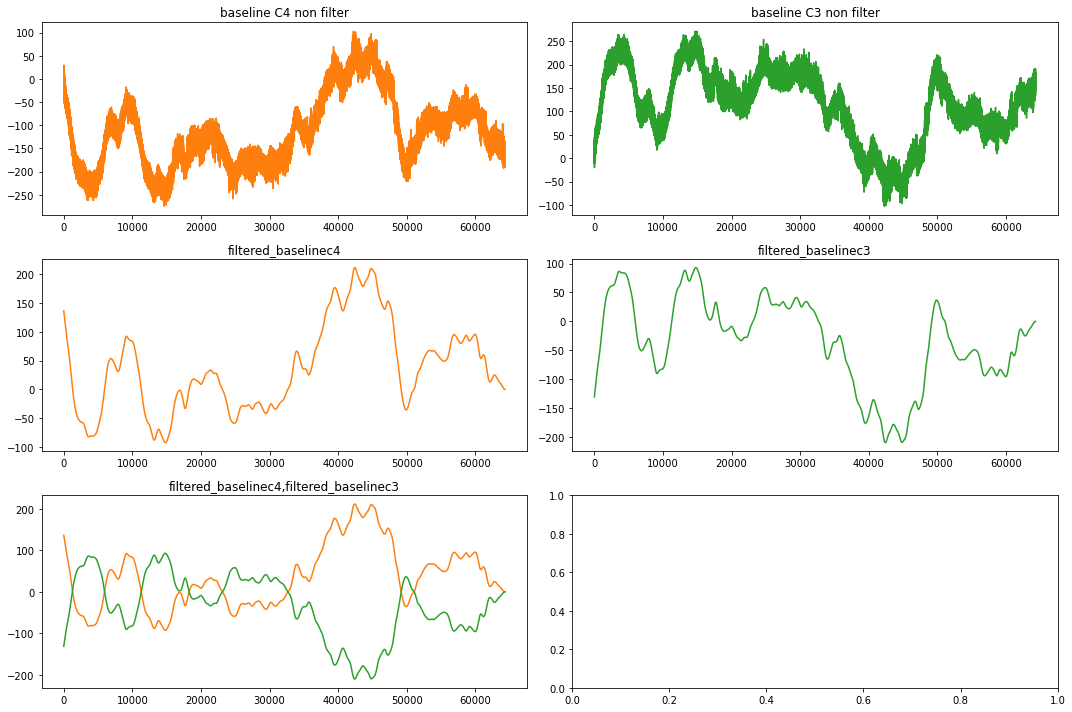

In [34]:
fig, axs = plt.subplots(3, 2 ,figsize=(15, 10))
axs[0, 0].plot(time,baseline['C4'],'tab:orange')
axs[0, 0].set_title('baseline C4 non filter')
axs[1, 0].plot(time, filtered_baselinec4, 'tab:orange')
axs[1, 0].set_title('filtered_baselinec4')

axs[0, 1].plot(time,baseline['C3'],'tab:green')
axs[0, 1].set_title('baseline C3 non filter')
axs[1, 1].plot(time, filtered_baselinec3, 'tab:green')
axs[1, 1].set_title('filtered_baselinec3')


axs[2, 0].plot(time, filtered_baselinec4, 'tab:orange')
axs[2, 0].plot(time, filtered_baselinec3, 'tab:green')
axs[2, 0].set_title('filtered_baselinec4,filtered_baselinec3')

In [58]:
import pywt
x =filtered_leftc4
coeffs = pywt.wavedec(x,'db1',level=4,mode = 'periodic')
cA4,cD4,cD3,cD2,cD1 = coeffs
y= pywt.waverec(coeffs,'db1',mode = 'periodic')
# print(cA2)
# print(cD2)
# print(cD1)
# print(y)

Text(0.5, 1.0, 'Approximation Coeff. (cA)')

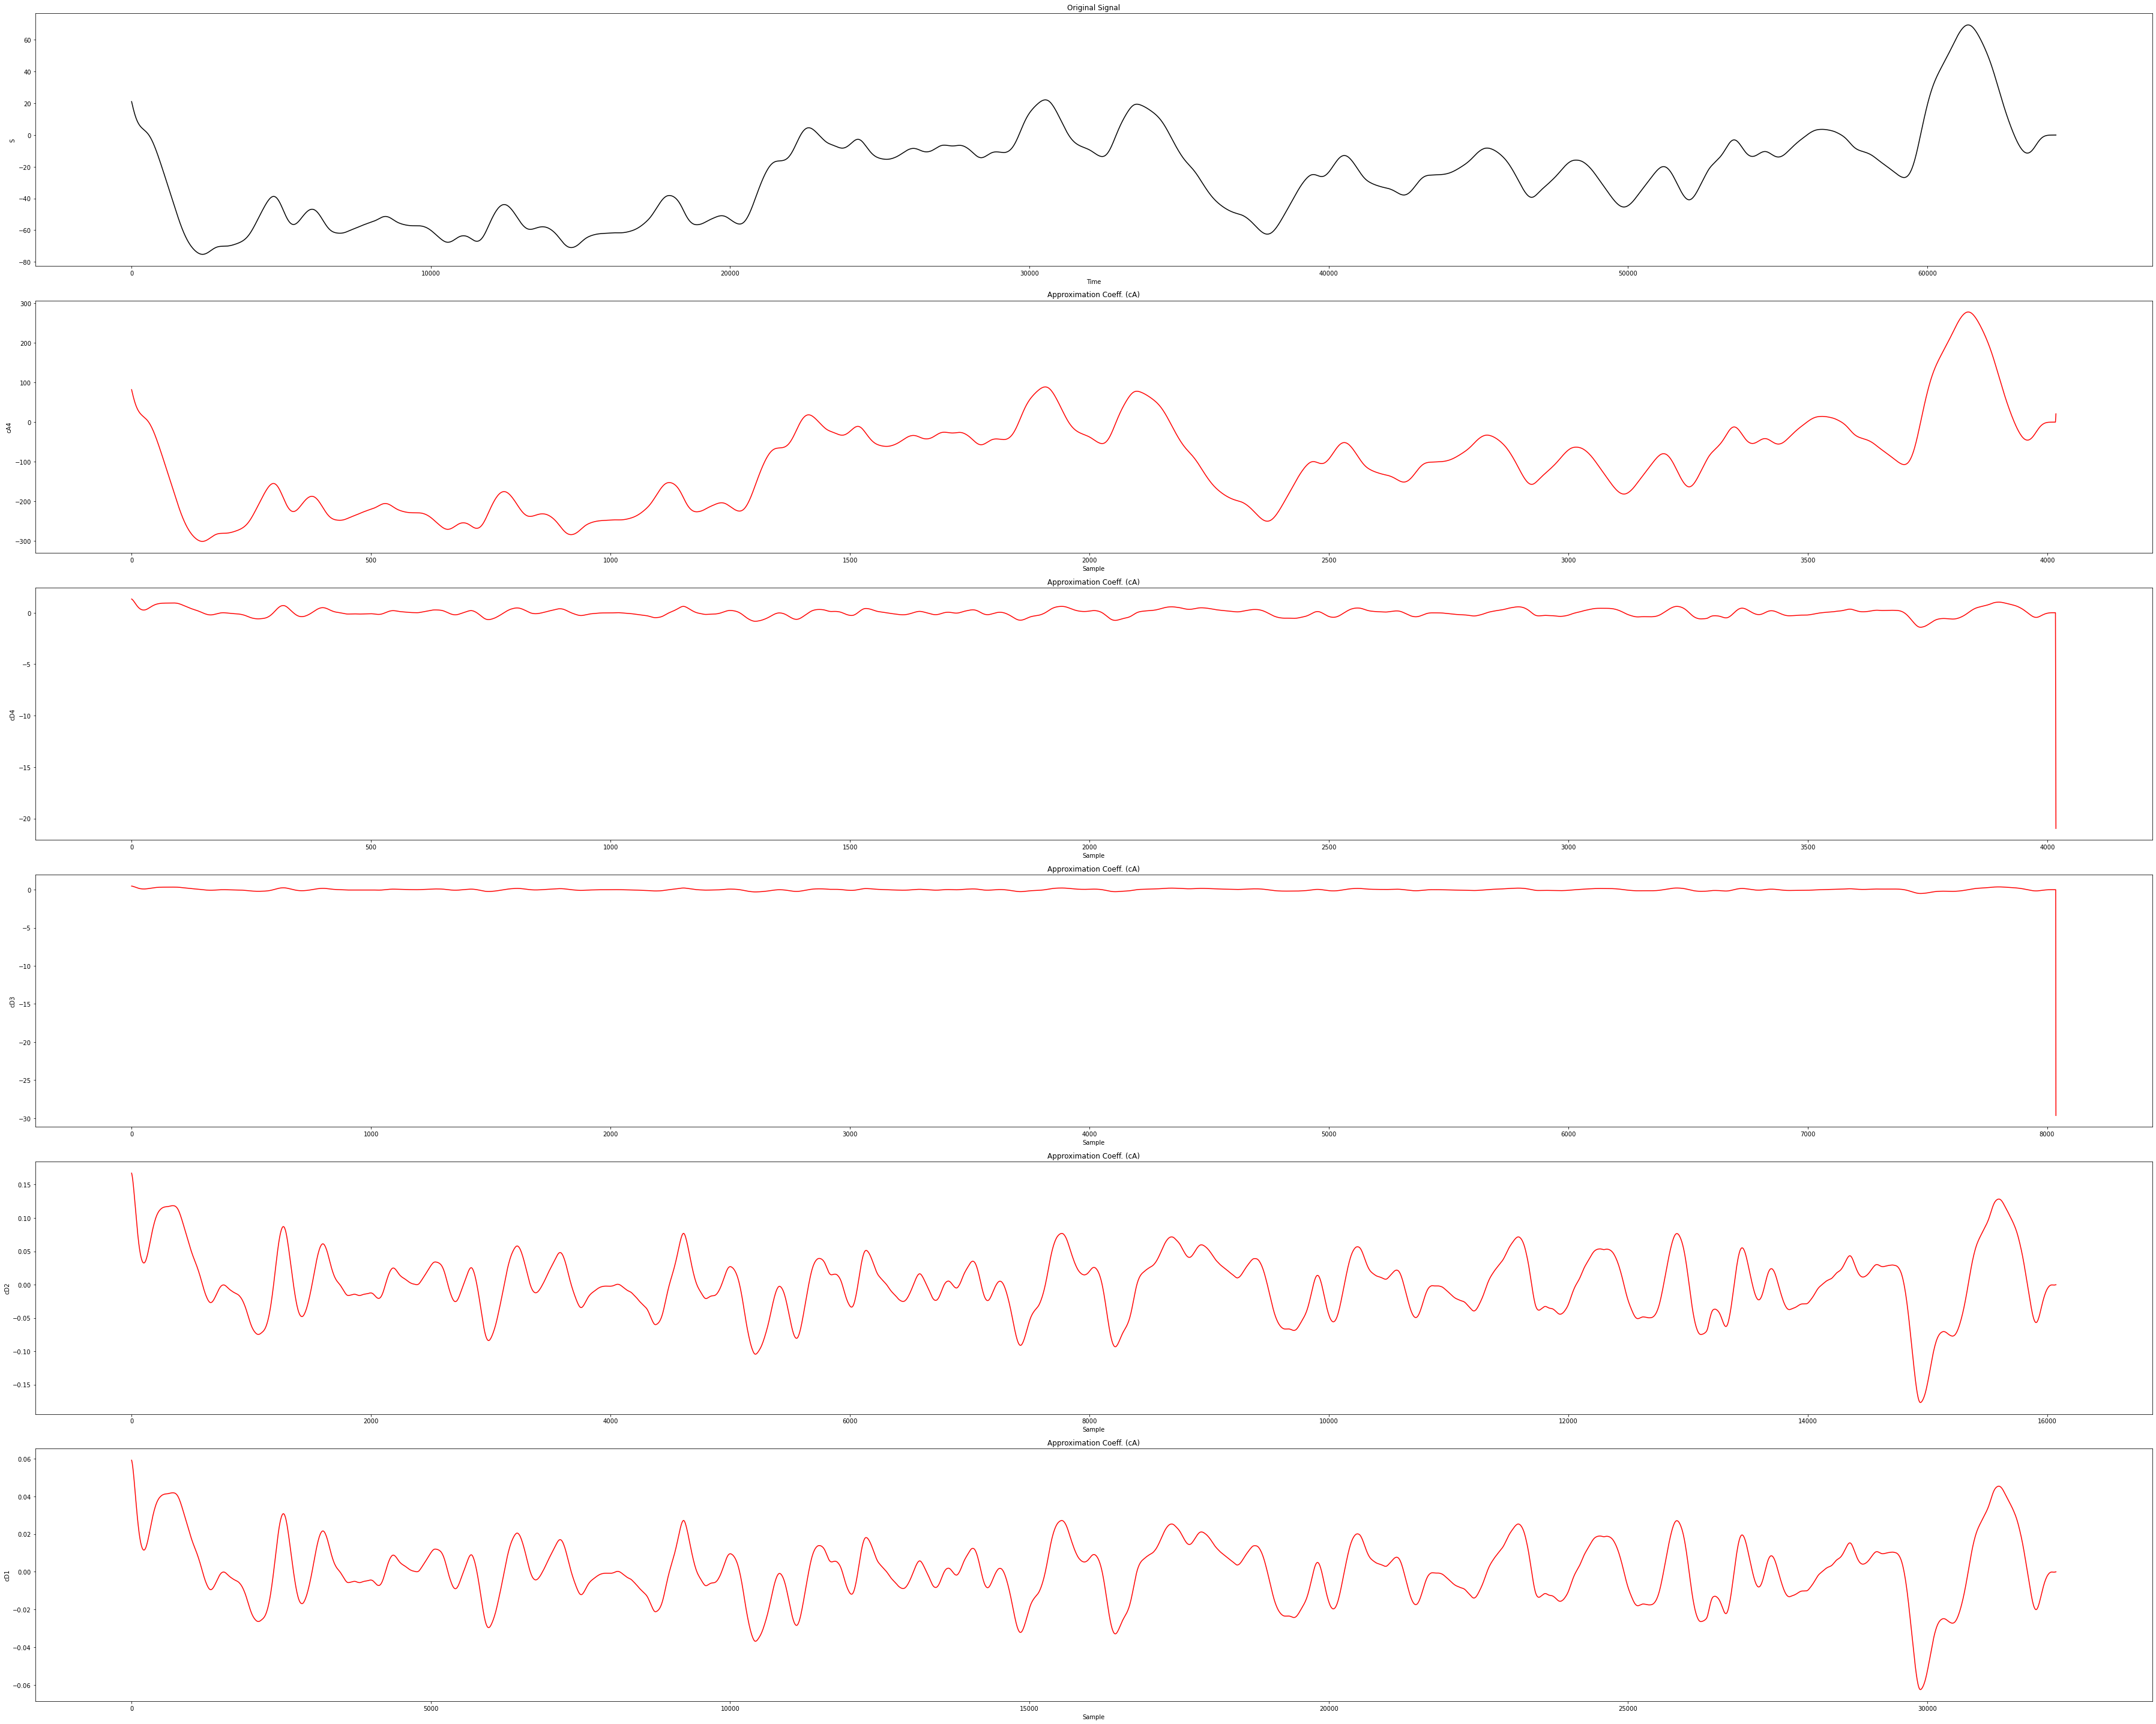

In [59]:
plt.figure(figsize = (50,40))
plt.subplot(6,1,1)
plt.plot(time,x, color='k')
plt.xlabel('Time')
plt.ylabel('S')
plt.title('Original Signal')

plt.subplot(6,1,2)
plt.plot(cA4, color='r')
plt.xlabel('Sample')
plt.ylabel('cA4')
plt.title('Approximation Coeff. (cA)')

plt.subplot(6,1,3)
plt.plot(cD4, color='r')
plt.xlabel('Sample')
plt.ylabel('cD4')
plt.title('Approximation Coeff. (cA)')

plt.subplot(6,1,4)
plt.plot(cD3, color='r')
plt.xlabel('Sample')
plt.ylabel('cD3')
plt.title('Approximation Coeff. (cA)')

plt.subplot(6,1,5)
plt.plot(cD2, color='r')
plt.xlabel('Sample')
plt.ylabel('cD2')
plt.title('Approximation Coeff. (cA)')

plt.subplot(6,1,6)
plt.plot(cD1, color='r')
plt.xlabel('Sample')
plt.ylabel('cD1')
plt.title('Approximation Coeff. (cA)')

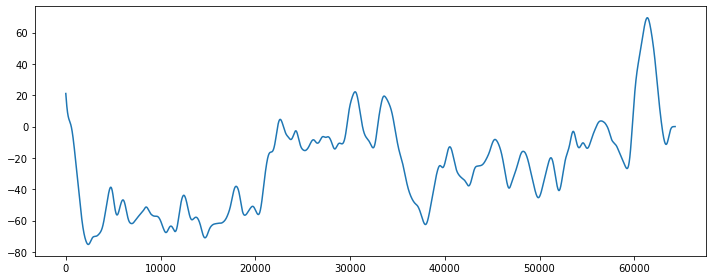

In [ ]:
plt.plot(time, x)

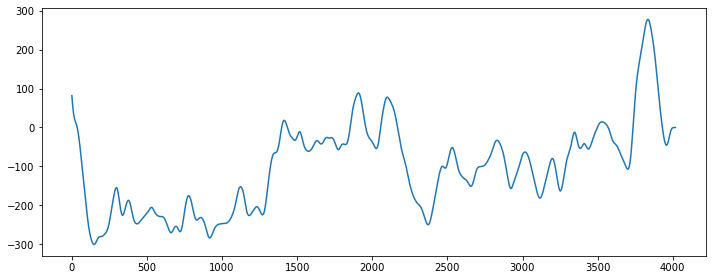

In [ ]:
plt.plot(cA4)

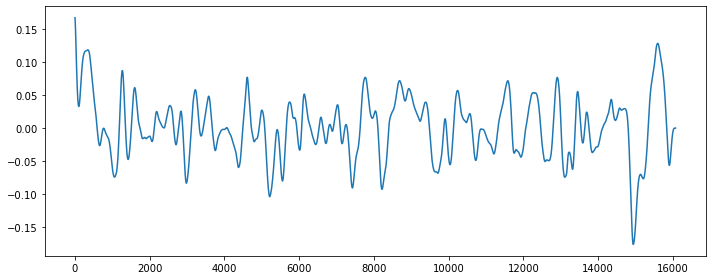

In [48]:
plt.plot(cD2)

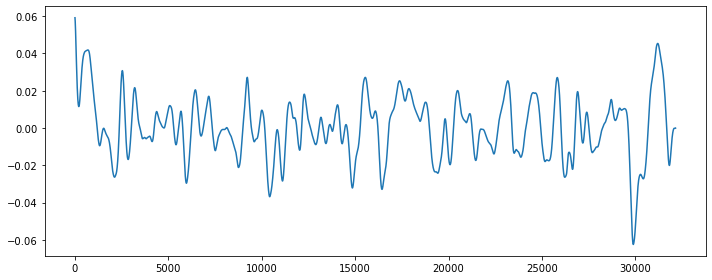

In [49]:
plt.plot(cD1)

In [ ]:
plt.plot(y)

In [ ]:
np.sqrt([1,4,9])

In [ ]:
N = rawdata_left['C4'].shape[0]
rms = np.sqrt(sum((rawdata_left['C4'])**2/N))
rms

In [ ]:
N = filtered_leftc4.shape[0]
rms = np.sqrt(sum((rawdata_left['C4'])**2/N))
rms

In [ ]:
rawdata_left['C4'][2]**2

In [ ]:
import pywt

In [ ]:
plt.plot(rawdata['left'][row_order['C4']],color='orange', label='left');
plt.plot(rawdata['right'][row_order['C4']],color='green', label='right');
plt.legend();

In [ ]:
plt.plot(rawdata['left'][row_order['C4']][:200],color='orange', label='left');
# plt.plot(rawdata['right'][row_order['C4']][:200],color='green', label='right');
plt.legend();

In [ ]:
plt.plot(rawdata['baseline'][row_order['C3']]);  
plt.plot(rawdata['baseline'][row_order['C4']]);

In [ ]:
plt.plot(rawdata['left'][row_order['C3']],color='orange', label='leftC3');
plt.plot(rawdata['left'][row_order['C4']],color='gray', label='leftC4');
plt.legend();

In [ ]:
plt.plot(rawdata['right'][row_order['C3']],color='green', label='rightC3');
plt.plot(rawdata['right'][row_order['C4']],color='gray', label='rightC4');
plt.legend();

In [ ]:
plt.plot(rawdata['left'][row_order['CZ']],color='blue', label='leftCZ');
plt.plot(rawdata['right'][row_order['CZ']],color='gray', label='leftCZ');
plt.legend();

In [ ]:
# import scipy.io.wavfile
# import scipy.signal
# import numpy as np
# import matplotlib.pyplot as plt

# # read ECG data from the WAV file
# # sampleRate, data = scipy.io.wavfile.read('ecg.wav')
# # times = np.arange(len(data))/sampleRate

# # apply a 3-pole lowpass filter at 0.1x Nyquist frequency
# b, a = scipy.signal.butter(1, 0.1)
# filtered = scipy.signal.filtfilt(b, a, rawdata_left['C4'])

In [ ]:
# plt.figure(figsize=(10, 4))

# plt.subplot(121)
# plt.plot(time, rawdata_left['C4'])
# plt.title("ECG Signal with Noise")
# plt.margins(0, .05)

# plt.subplot(122)
# plt.plot(time, filtered)
# plt.title("Filtered ECG Signal")
# plt.margins(0, .05)

# plt.tight_layout()
# plt.show()

In [ ]:
b, a = scipy.signal.butter(2, [1.0, 60.0], 'band')
filteredBandPass = scipy.signal.lfilter(b, a, rawdata_left['C4'])

In [ ]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io

In [ ]:
mat = scipy.io.loadmat("Subject1_1D.mat")
mat

In [ ]:
numpy_left = mat['left']
numpy_right = mat['right']

numpy_left = numpy_left.reshape(-1,19)
numpy_right = numpy_right.reshape(-1,19)

left = pd.DataFrame(numpy_left, columns=['FP1', 'FP2', 'F3', 'F4', 
                                          'C3', 'C4', 'P3', 'P4', 
                                          'O1', 'O2', 'F7', 'F8', 
                                          'T3', 'T4', 'T5', 'T6', 
                                          'FZ', 'CZ', 'PZ'])

right = pd.DataFrame(numpy_right, columns=['FP1', 'FP2', 'F3', 'F4', 
                                          'C3', 'C4', 'P3', 'P4', 
                                          'O1', 'O2', 'F7', 'F8', 
                                          'T3', 'T4', 'T5', 'T6', 
                                          'FZ', 'CZ', 'PZ'])

In [ ]:
left_channels = left[["C3", "C4", "CZ"]]
right_channels = right[["C3", "C4", "CZ"]]

In [ ]:

# import mne
# from mne import create_info
# from mne.io import RawArray

In [ ]:
# sfreq = 125
# ch_names = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6','FZ', 'CZ', 'PZ']
# ch_types = ['eeg'] * (len(left.columns) - 1) + ['stim']
# ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

# left = left.T  #mne looks at the tranpose() format
# left[:-1] *= 1e-6  #convert from uVolts to Volts (mne assumes Volts data)

# info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

# raw = mne.io.RawArray(left, info)
# # raw.set_montage(ten_twenty_montage)

In [ ]:
raw.plot_psd(color='blue')

In [ ]:
import os
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)
raw.crop(tmax=60).load_data()
raw.pick(['EEG 0{:02}'.format(n) for n in range(41, 60)])

In [ ]:
raw.plot()

In [ ]:
mne.io.read_raw_fieldtrip('Subject1_1D.mat',dict, data_name='baseline')

In [ ]:
import mne
from mne import create_info
from mne.io import RawArray
original_data = mne.io.read_raw_fiff('original_data.fif', preload=False)
original_info = original_data.info
data_from_ft = mne.read_evoked_fieldtrip('Subject1_1D.mat', original_info)

In [ ]:
from __future__ import print_function

import mne
import numpy as np

In [ ]:
# Create some dummy metadata
n_channels = 19
sampling_rate = 200
info = mne.create_info(32, sampling_rate)
print(info)

In [ ]:
# Create some dummy metadata
n_channels = 32
sampling_rate = 200
info = mne.create_info(32, sampling_rate)
print(info)

In [ ]:
type(info)

In [ ]:
# Generate some random data
data = np.random.randn(5, 1000)

# Initialize an info structure
info = mne.create_info(
    ch_names=['MEG1', 'MEG2', 'EEG1', 'EEG2', 'EOG'],
    ch_types=['grad', 'grad', 'eeg', 'eeg', 'eog'],
    sfreq=100
)

custom_raw = mne.io.RawArray(data, info)
print(custom_raw)

In [ ]:
# Generate some random data: 10 epochs, 5 channels, 2 seconds per epoch
sfreq = 100
data = np.random.randn(10, 5, sfreq*2)

# Initialize an info structure
info = mne.create_info(
    ch_names=['MEG1', 'MEG2', 'EEG1', 'EEG2', 'EOG'],
    ch_types=['grad', 'grad', 'eeg', 'eeg', 'eog'],
    sfreq=sfreq
)

In [ ]:
# Create an event matrix: 10 events with a duration of 1 sample, alternating
# event codes
events = np.array([
    [0, 1, 1],
    [1, 1, 2],
    [2, 1, 1],
    [3, 1, 2],
    [4, 1, 1],
    [5, 1, 2],
    [6, 1, 1],
    [7, 1, 2],
    [8, 1, 1],
    [9, 1, 2],
])

In [ ]:
event_id = dict(smiling=1, frowning=2)

In [ ]:
# Trials were cut from -0.1 to 1.0 seconds
tmin = -0.1

In [ ]:
custom_epochs = mne.EpochsArray(data, info, events, tmin, event_id)

print(custom_epochs)

# We can treat the epochs object as we would any other
_ = custom_epochs['smiling'].average().plot()

In [ ]:
Data = load('Subject1_1D.mat');

In [ ]:
import matplotlib.pyplot as plt
plt(Data[1,:], Data[2,:])

In [ ]:
rawdata = sio.loadmat('Subject1_1D.mat')
plt(rawdata['left'][row_order['C3']])

In [ ]:
rawdata['left']

In [ ]:
downSampleToShow = 500

In [ ]:
train_set_signals[::downSampleToShow].plot(x="id", y="Fp1", ax=axis)

In [ ]:
import zipfile
with zipfile.ZipFile("train.zip","r") as z:
    z.extractall(".")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_set_signals.head()
axis = plt.gca()
# downSampleToShow = 500
train_set_signals[::downSampleToShow].plot(x="id", y="Fp1", ax=axis)
train_set_signals[::downSampleToShow].plot(x="id", y="PO10", ax=axis, figsize=(15,5))
# train_set_labels[::downSampleToShow].plot(figsize=(15,5))
plt.show()

In [ ]:
axis = plt.gca()
downSampleToShow = 500
rawdataleft[:1600].plot(x="index", y="C3", ax=axis, figsize=(10,4))
rawdataleft[:1600].plot(x="index", y="C4", ax=axis)
plt.show()

In [ ]:
rawdataleft = pd.DataFrame.from_dict(rawdata['left'])
rawdataleft = rawdataleft.T
rawdataleft = rawdataleft.rename(columns=row_order)
rawdataleft.reset_index(inplace =True)

In [ ]:
rawdataleft

In [ ]:
rawdataleft[::downSampleToShow]

In [ ]:
rawdataleft[200:]